# Compulsory Assignment 1: Dense neural networks

Please fill out the the group name, number, members and optionally the name below. 

**Group number**: 22\
**Group member 1**: Andrea Øwre\
**Group member 2**: Martine Olsen\
**Group member 3**: Mathilde Haglund\
**Group name (optional)**: Dream team 

# Assignment submission
To complete this assignment answer the relevant questions in this notebook and write the code required to implement the relevant models. The assignemnt is submitted by handing in this notebook as an .ipynb file and as a .pdf file. 

NOTE: Remember to go through the rules given in the lecture "Introduction to compulsory assignments", as there are many do's and dont's with regard to how you should present the work you are going to submit. 

# Introduction 

In this assignment we will continue with the task of classifying handwritten digits from the MNIST dataset, used in the voluntary assignment where we designed a neural network from scratch. But, today you will implement the network using the Keras API of the TensorFlow library. TensorFlow and PyTorch are both free open-source software libraries intended to simplify multiplication of tensors, but are mostly used for the design and implementation of deep neural networks. Both libraries simplify the implementation of neural networks, and allow for faster training of networks by utlizing hardware acceleration with Graphical Processing Units (GPUs) or Tensor Processing Units (TPUs)

TensorFlow was developed by Google Brain for internal use in Google and was initially released under Apache 2.0 License in 2015 [1](https://en.wikipedia.org/wiki/TensorFlow). Keras was initially released as separate software library, developed by François Chollet, to simplify the Python interface for design of artificial neural networks. Up until version 2.3 Keras supported multiple backend libraries including TensorFlow, Microsoft Cognitive Toolkit, Theano, and PlaidML [2](https://en.wikipedia.org/wiki/Keras). When TensorFlow 2.0 was released in 2019, keras was included as a TensorFlow specific API that is accessible by:

```python
import tensorflow.keras as ks
```
PyTorch was originally developed by Meta AI (formerly known as Facebook) in 2016, but is now under umbrella of the Linux foundation, and is open-source under the BSD license [3](https://en.wikipedia.org/wiki/PyTorch). While TensorFlow was the most popular framework for a long time, PyTorch has been gaining more and more users in the last five years and is now more used in industry and is becoming more popular in research as well. 

The lectures of DAT300 will be taught using the Keras API in TensorFlow, and we reccomend you to stick with Keras and TensorFlow for this course as it is easier for beginners to get started with. 

## Assignment structure

1. Part 1: Implementing Dense NN for classifying MNIST.
2. Part 2: Training a machine learning classifier on MNIST.
3. Part 3: Comparison and discussion.

## Note on the voluntary assignment
Some of the questions in this task will ask you to compare the results from training this network to the results you had in the voluntary assignment with regard to training algorithm used and the time it took to train the network implemented with Numpy and with TensorFlow/PyTorch. If you did not do the voluntary assignment yourself, have a look at the solutions that should be posted and run through the solutions-notebook to get the results you need for a comparison. 


## Library imports

In [166]:
import time
from tqdm import tqdm # Cool progress bar

import numpy as np
import pandas as pd
import tensorflow.keras as ks
import tensorflow as tf
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns

from utilities import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

SEED = 458
RNG = np.random.default_rng(SEED) # Random number generator

# Task 1: Importing, preprocess and visualizing the data
To import the data of the MNIST dataset for this assignment
* Copy the data/ folder from the folder where you kept the last assignment, and run the load_data() function from the `utilities.py` file.
* Just download the data again by re-running the load_data() function from the `utilities.py` file.

In this assignment you yourselves will be responsible for the data-preprocessing. Use the cells below for preprocessing and visualization, and optionally some exploration of the dataset if you feel inclined. 

## Importing data

In [73]:
datasets = load_mnist()
X_train, y_train = datasets["X_train"], datasets["y_train"]
X_val,   y_val   = datasets["X_val"],   datasets["y_val"]
X_test,  y_test  = datasets["X_test"],  datasets["y_test"]

X_train = np.concatenate([X_train, X_val], axis=0)
y_train = np.concatenate([y_train, y_val], axis=0).astype("int32")

del datasets, X_val, y_val # Good to reduce uneccesary RAM usage

X_train shape (50000, 28, 28)
y_train shape (50000,)
X_val shape (10000, 28, 28)
y_val shape (10000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
small_X_train shape (3000, 28, 28)
small_y_train shape (3000,)
small_X_val shape (500, 28, 28)
small_y_val shape (10000,)


## Task 1.1 Preprocessing

Preprocess the data in whatever way you deem sensible.

In [74]:
# Normalizing datasets between [0,1]
X_train       = X_train.astype("float32")      /np.max(X_train)
X_test        = X_test.astype("float32")       /np.max(X_test)

In [75]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


## Task 1.1 Visualization

Visualize the data in whatever manner you find helpful/sensible. 

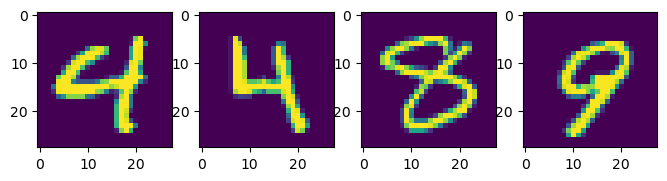

In [76]:
# Loading some random images
random_images = RNG.choice(X_train, replace=False, size=4)
fig, ax = plt.subplots(1,4,figsize=(8,8))
for i in range(random_images.shape[0]):
    ax[i].imshow(random_images[i])

# Task 2: TensorFlow vs. Numpy
In this task you will redesign the network you implemented in Numpy for the voluntary assignment with TensorFlow, and compare the two implementations. 
## Task 2.2: Implement the F1-score
In the cell below implement or import a function of the F1-score metric.

In [137]:
f1_score = F1Score(num_classes=10, average="macro")

## Task 2.2: Implement the network from the voluntary assignment

Implement a network with the following architecture:
* Input layer: (28, 28)
* Hidden layer: 30 units, sigmoid activation
* Output layer: 10 units, sigmoid activation

Compile the model using
* The `'MSE'` loss function
* The `'adam'` learning rate optimizer
* `'accuracy'` and an implementation of the **F1-score** as metrics

Train the model using
* batch size of 10 images
* 5 epochs
* A validation split of 1/6 

Implement the model, train the model and plot the training history in the code cell(s) below. 

In [187]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Input layer
    tf.keras.layers.Flatten(),  # Flatten the 2D input to 1D
    tf.keras.layers.Dense(30, activation="sigmoid"),  # Hidden layer
    tf.keras.layers.Dense(10, activation="sigmoid")  # Output layer
])

In [146]:
# Compile the model
model.compile(
    optimizer="adam", 
    loss="mse",  # Mean Squared Error loss function
    metrics=["accuracy", [f1_score]]  # Using accuracy and custom F1-score as metrics
)

## Task 2.3: Train the network and plot the training history

Plot the training process in the same manner as done in the voluntary assignment. Feel free to use the function `plot_training_history()` in `utilities.py`

In [147]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)

In [148]:
# Train the model
history = model.fit(
    X_train, y_train_one_hot,
    batch_size=10,
    epochs=5,
    validation_split=1/6  # Using 1/6 of the training data for validation
)

Epoch 1/5
5000/5000 [==============================] - 12s 2ms/step - loss: 0.0290 - accuracy: 0.8479 - f1_score: 0.8453 - val_loss: 0.0147 - val_accuracy: 0.9154 - val_f1_score: 0.9140
Epoch 2/5
5000/5000 [==============================] - 10s 2ms/step - loss: 0.0127 - accuracy: 0.9290 - f1_score: 0.9280 - val_loss: 0.0114 - val_accuracy: 0.9336 - val_f1_score: 0.9328
Epoch 3/5
5000/5000 [==============================] - 10s 2ms/step - loss: 0.0105 - accuracy: 0.9414 - f1_score: 0.9407 - val_loss: 0.0103 - val_accuracy: 0.9403 - val_f1_score: 0.9397
Epoch 4/5
5000/5000 [==============================] - 10s 2ms/step - loss: 0.0093 - accuracy: 0.9476 - f1_score: 0.9470 - val_loss: 0.0097 - val_accuracy: 0.9433 - val_f1_score: 0.9427
Epoch 5/5
5000/5000 [==============================] - 11s 2ms/step - loss: 0.0085 - accuracy: 0.9527 - f1_score: 0.9522 - val_loss: 0.0092 - val_accuracy: 0.9466 - val_f1_score: 0.9461


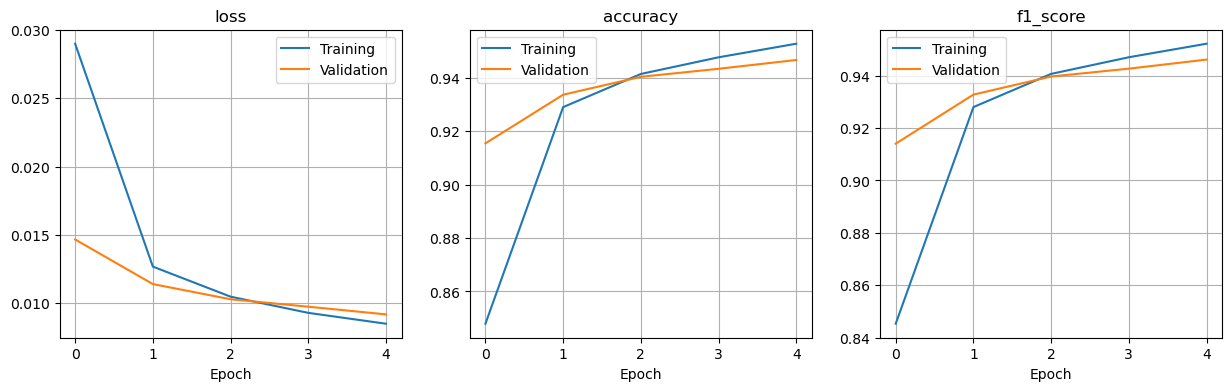

In [149]:
# Plot training history
plot_training_history(history)

## Task 2.4: Compare the results from the TensorFlow implementation with the Numpy implementation
**Question 2.2.1**: How long did it take to train the TensorFlow/PyTorch implementation of the network on the *entire* dataset for five epochs compared time it took to train the Numpy implementation?


**Question 2.2.2**: What is the biggest (defining) difference with how the TensorFlow implementation **was trained** compared to the Numpy implementation?


#### 2.2.1

The TensorFlow implementation used about 11-12 seconds per iteration, while the Numpy implementation used about 57 seconds per iteration.  

#### 2.2.2

While Numpy requires that you code every details from scratch, including e.g. backpropagation, optimization, and other variables, TensorFlow provides Keras to handle defining, training and evaluating of models. Tensorflow can also automatically compute the gradient during training. Optimization is also easier in TensorFlow as it has several optimization algorithms built in. 

# Task 3: Design your own network architecture

As you probably noticed in the last task, the performance of the simple network with a single hidden layer and 30 hidden units does not perform particularily well. In this task you are free to design the network architecture for the MNIST handwritten digit recognition challenge with a couple of stipulations. For this task you will **only use Dense or fully connected layers**, and use **accuracy and the F1-score** as a metric. Otherwise, you are free to use whatever loss-function and activation functions you want and train it for as many epochs you want. 

## Task 3.1: Implement your own network architecture
Design your network below:

(Feel free to add as many code and markdown cells as you want)

In [153]:
# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [154]:
# Instantiate the F1Score metric
f1_score = F1Score(num_classes=10, average="macro")

In [155]:
# Define the model architecture using only Dense layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    tf.keras.layers.Dense(64, activation="relu"),  # First hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation="relu"),  # Second hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer with softmax activation for 10 classes
])

In [156]:
# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", f1_score])  # Using accuracy and custom F1-score as metrics

In [157]:
# Train the model
history = model.fit(X_train, y_train_one_hot, 
                    epochs=10, 
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2962 - accuracy: 0.9139 - f1_score: 0.9129 - val_loss: 0.1574 - val_accuracy: 0.9544 - val_f1_score: 0.9542
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1315 - accuracy: 0.9599 - f1_score: 0.9595 - val_loss: 0.1267 - val_accuracy: 0.9604 - val_f1_score: 0.9601
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0951 - accuracy: 0.9707 - f1_score: 0.9705 - val_loss: 0.1172 - val_accuracy: 0.9655 - val_f1_score: 0.9653
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0746 - accuracy: 0.9764 - f1_score: 0.9762 - val_loss: 0.0931 - val_accuracy: 0.9717 - val_f1_score: 0.9714
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0611 - accuracy: 0.9803 - f1_score: 0.9802 - val_loss: 0.0938 - val_accuracy: 0.9711 - val_f1_score: 0.9708
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - 

## Task 3.2: Train your network and visualize the training history

Plot the training process in the same manner as done in the voluntary assignment. Feel free to use the function `plot_training_history()` in `utilities.py`

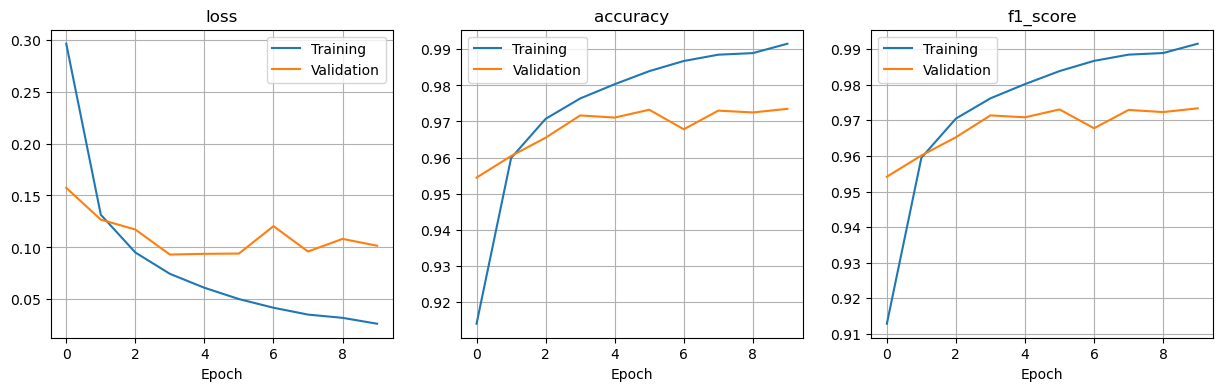

In [159]:
# Plot training history
plot_training_history(history)

# Task 4: Design and train a _classical_ machine learning classifier

Pick your **favourite** machine learning classifer that you learned about in DAT200 and train it for the MNIST handwritten digits recognition problem. (Hint: use the scikit-learn library).

In [177]:
# Load the MNIST handwritten digit dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [178]:
# Reshape the images to 1D arrays
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [179]:
# Normalizing datasets between [0,1]
X_train       = X_train.astype("float32")      /np.max(X_train)
X_test        = X_test.astype("float32")       /np.max(X_test)

In [180]:
# Combine the train and test sets for splitting
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

In [181]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [183]:
# Record start time
start_time = time.time()

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Record end time
end_time = time.time()

training_time = end_time - start_time

In [184]:
# Predict the labels of the test set
y_pred = rf_classifier.predict(X_test)

In [185]:
# Calculate the accuracy and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

Accuracy: 0.9675
Macro F1 Score: 0.9673
Training Time: 57.8738 seconds


# Task 5: Compare and discuss

Evaluate the three models you have implemented in task 2, 3 and 4 on the test dataset and compare them based 
* Accuracies and F1-scores they attain
* Time it takes to train them

Did you experience any trouble when training the different models in task 2-4? 

**Task 5 discussion Here:**


Despite of having only a single hidden layer and 30 hidden units, the model worked reasonably well. The accuracy went as high as 95.27%, and the F1 score maxed at 0.9522. The loss of the model reached a more than acceptable 0.0085. 

The model in task 3 performed even better. Here we converted the labesl to one-hot encoding in order to improve performance. We also added a second hidden layer, and for both the first and second hidden layer we used 64 units and ReLU activation (we found a good performing architecture through trial and error). For the output layer we used softmax activation for 10 classes (also through observations done by trial and error). The optimizer used was still "adam", for the loss function the "categorical_crossentropy" function was chosen, and of course the metrics were the same as according to the assignment. We adjusted the number of epochs to 10 and the validation split to 0.2. All these changes led to a generally better performing model, as the accuracy went up to 99.16%, the F1 score was 0.9915 and the loss was 0.025. The loss is actually a bit higher than for the first model, which means that this model were slightly less accurate. 

For the model in task 4, the machine learning model, we chose RandomForrest. We decided the test size to be two, and the number of trees to be 100. Then we did a fit and timed the training time. The accuracy was 96.75% and the F1 score was 0.9673. This model performed better than the first model (from task 2), but slightly worse than the second model (from task 3). 

For training time, the first model (task 2) used about 53 seconds, the second model (task 3) used about 45 seconds, and the third model (task 4) used about 58 seconds. This means that our best performing model were also the fastes one on training time, our next best performer used the longest time and our worst performer were somewhere in the middle.


There weren't many troubles with implementing the models, but one challenge was to implement the F1 score so that it worked with Tensorflow/keras. We spent some time figuring that out, and finally found a package called tensorflow.addons that worked. The "trial and error"-fase were also a bit time consuming, but it was fun testing out different parameter values to see the impact on the model. 